In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [5]:
df = pd.read_csv("fake_job_postings.csv")
print(df.columns)
df_majority = df[df.fraudulent == 0]
df_minority = df[df.fraudulent == 1]

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')


In [7]:
df = df[["title", "description", "requirements", "fraudulent"]]


In [8]:
df["text"] = df[["title", "description", "requirements"]].astype(str).agg(" ".join, axis=1)
df.dropna(subset=["text"], inplace=True)


/tmp/ipython-input-804529556.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="fraudulent", palette="coolwarm")


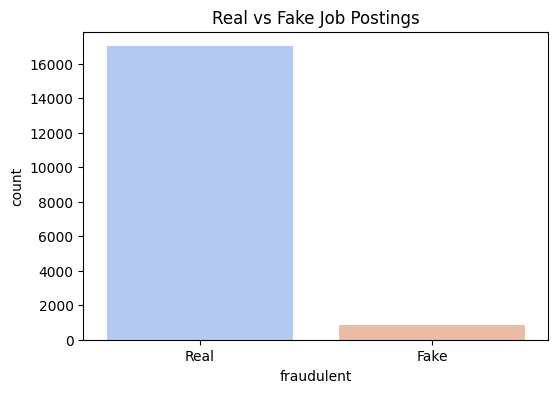

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="fraudulent", palette="coolwarm")
plt.xticks([0, 1], ["Real", "Fake"])
plt.title("Real vs Fake Job Postings")
plt.show()

In [10]:
from sklearn.utils import resample


df_majority = df[df.fraudulent == 0]
df_minority = df[df.fraudulent == 1]


df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples=len(df_majority),
                                 random_state=42)
df_balanced = pd.concat([df_majority, df_minority_upsampled])
df_balanced = df_balanced.sample(frac=1, random_state=42)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    df_balanced["text"], df_balanced["fraudulent"], test_size=0.2, random_state=42
)


In [15]:
vectorizer = TfidfVectorizer(stop_words="english", max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [16]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [17]:
y_pred = model.predict(X_test_tfidf)


In [18]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9873640905083749

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      3405
           1       0.98      1.00      0.99      3401

    accuracy                           0.99      6806
   macro avg       0.99      0.99      0.99      6806
weighted avg       0.99      0.99      0.99      6806



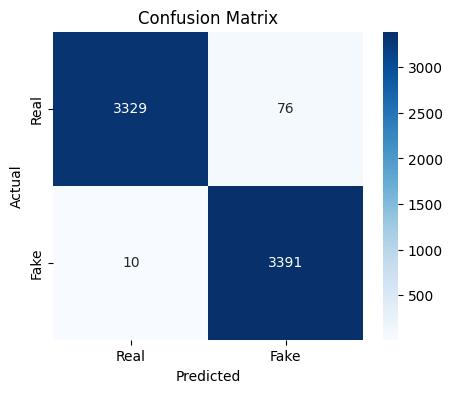

In [19]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [21]:
while True:
    user_input = input("\nEnter job posting text (or type 'exit' to quit):\n")
    if user_input.lower() == "exit":
        break
    user_tfidf = vectorizer.transform([user_input])
    prediction = model.predict(user_tfidf)[0]
    if prediction == 1:
        print("🚨This job posting seems **FAKE**!")
    else:
        print("✅ This job posting seems **REAL**.")


Enter job posting text (or type 'exit' to quit):
"We are hiring a Python Developer for our Bangalore office. Requirements: 2+ years of Python experience, knowledge of Django/Flask, SQL, and APIs. Salary: ₹6–8 LPA based on experience. Apply via our official careers page: companywebsite.com/careers"
✅ This job posting seems **REAL**.

Enter job posting text (or type 'exit' to quit):
EARN ₹10,000 DAILY FROM HOME!!! No experience needed. Just send your personal details and pay ₹200 registration fee to get started. Only 10 slots available — apply now before it’s too late!"
🚨This job posting seems **FAKE**!

Enter job posting text (or type 'exit' to quit):
"Congratulations! You have been pre-selected for a work-from-home typing job. Pay: ₹5,000/day. To confirm your position, send a copy of your ID proof and pay ₹500 security deposit. Hurry! Offer valid only for 24 hours."
🚨This job posting seems **FAKE**!

Enter job posting text (or type 'exit' to quit):
We are seeking a highly skilled and 